# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.059736e+01     6.385908e+00
 * time: 0.0017080307006835938
     1     2.871816e+01     5.329180e+00
 * time: 0.006535053253173828
     2     2.147836e+01     6.999926e+00
 * time: 0.01205301284790039
     3     1.635884e+01     6.260644e+00
 * time: 0.01625204086303711
     4     1.165001e+01     2.580652e+00
 * time: 0.020203113555908203
     5     9.914070e+00     1.068721e+00
 * time: 0.024019956588745117
     6     9.231272e+00     1.954725e+00
 * time: 0.027199983596801758
     7     8.822813e+00     8.676078e-01
 * time: 0.030234098434448242
     8     8.548780e+00     6.085806e-01
 * time: 0.033776044845581055
     9     8.413382e+00     4.916698e-01
 * time: 0.03740811347961426
    10     8.324269e+00     6.146211e-01
 * time: 0.040921926498413086
    11     8.234532e+00     4.831662e-01
 * time: 0.0446169376373291
    12     8.224248e+00     1.007536e+00
 * time: 0.04757404327392578
    13     8.175956e+00     5.240300e-01


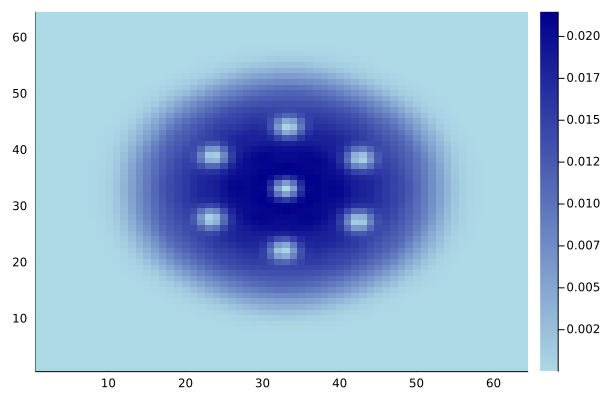

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)